In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
hp = pd.read_csv('sp500_stocks_4.18.2024.csv', parse_dates=True, index_col='Date')
hp = hp[(hp.index >= pd.Timestamp('2024-01-01')) & (hp.index <= pd.Timestamp('2024-12-31'))]


In [3]:
hp.head()

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2024-01-02,MMM,90.176018,91.973244,92.525085,90.677261,90.819397,3321053.0
2024-01-03,MMM,88.364296,90.125420,91.521736,89.297661,91.329430,3547575.0
2024-01-04,MMM,88.675812,90.443146,91.421402,90.058525,90.367889,3319976.0
2024-01-05,MMM,89.020119,90.794312,91.546822,89.924751,90.284279,1991579.0
2024-01-08,MMM,89.241463,91.020065,91.103676,89.958191,90.518394,2535042.0


In [4]:
mshp = hp[hp['Symbol'] == 'GOOG']

In [5]:
num_rows = mshp.shape[0]
print("Number of rows:", num_rows)

Number of rows: 74


In [6]:
mshp.tail()

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2024-04-11,GOOG,160.789993,160.789993,161.119995,157.929993,158.339996,17841700.0
2024-04-12,GOOG,159.190002,159.190002,161.699997,158.600006,159.404999,16968200.0
2024-04-15,GOOG,156.330002,156.330002,160.830002,156.149994,160.279999,21140900.0
2024-04-16,GOOG,156.000000,156.000000,157.229996,155.050003,155.639999,15413200.0
2024-04-17,GOOG,156.880005,156.880005,158.681000,156.134995,157.190002,16069524.0


C:\Users\ericz\AppData\Local\Temp\ipykernel_20444\3890262358.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in plt.gca().get_yticks()])


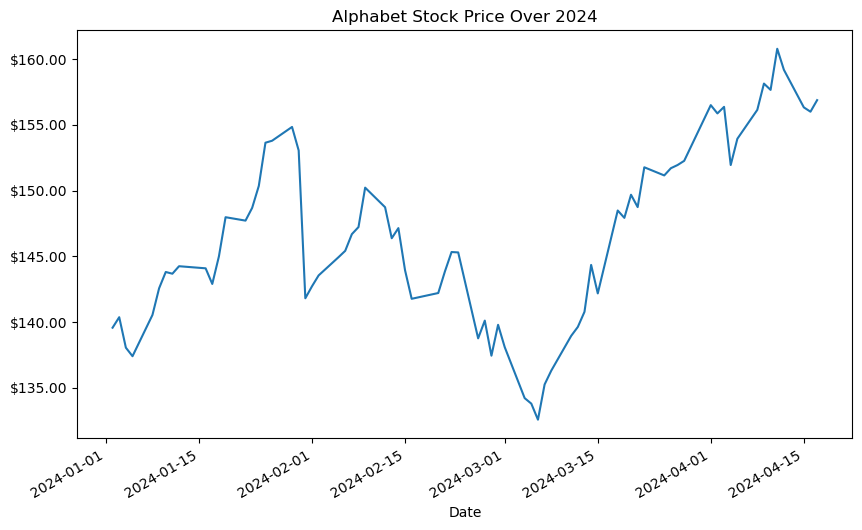

In [7]:
import matplotlib.pyplot as plt

mshp['Close'].plot(title='Alphabet Stock Price Over 2024', figsize=(10, 6))
plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in plt.gca().get_yticks()])
plt.show()

In [8]:
result = adfuller(mshp['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.377000
p-value: 0.593252


In [9]:
mshp['Differenced_Close'] = mshp['Close'] - mshp['Close'].shift(1)
mshp_diff = mshp.dropna()

C:\Users\ericz\AppData\Local\Temp\ipykernel_20444\3269642563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mshp['Differenced_Close'] = mshp['Close'] - mshp['Close'].shift(1)


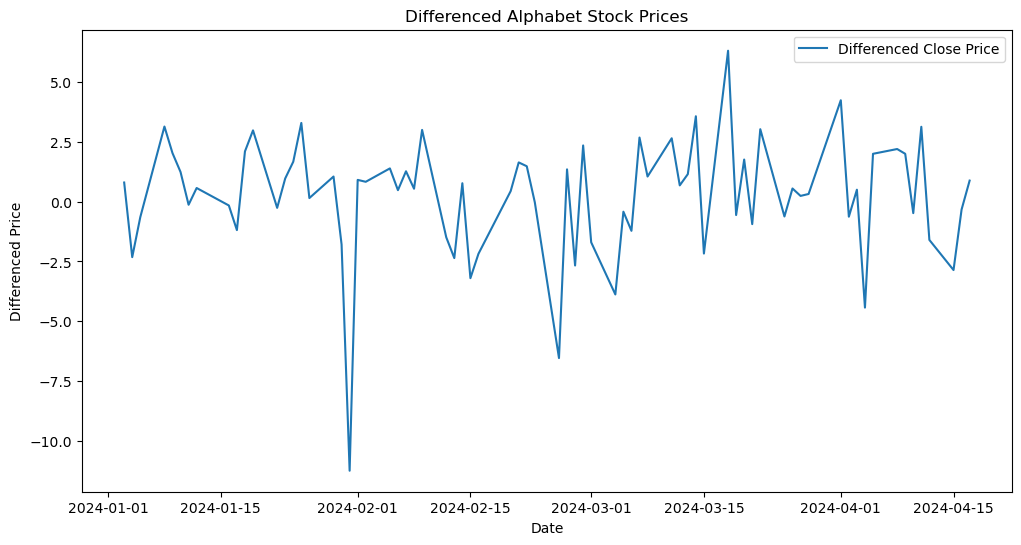

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(mshp_diff['Differenced_Close'], label='Differenced Close Price')
plt.title('Differenced Alphabet Stock Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

In [11]:
result = adfuller(mshp_diff['Differenced_Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.603674
p-value: 0.000000


In [12]:
result_diff = adfuller(mshp_diff['Differenced_Close'])
print('ADF Statistic after differencing: %f' % result_diff[0])
print('p-value after differencing: %f' % result_diff[1])
for key, value in result_diff[4].items():
    print('Critical Value (%s): %f' % (key, value))

ADF Statistic after differencing: -8.603674
p-value after differencing: 0.000000
Critical Value (1%): -3.524624
Critical Value (5%): -2.902607
Critical Value (10%): -2.588679


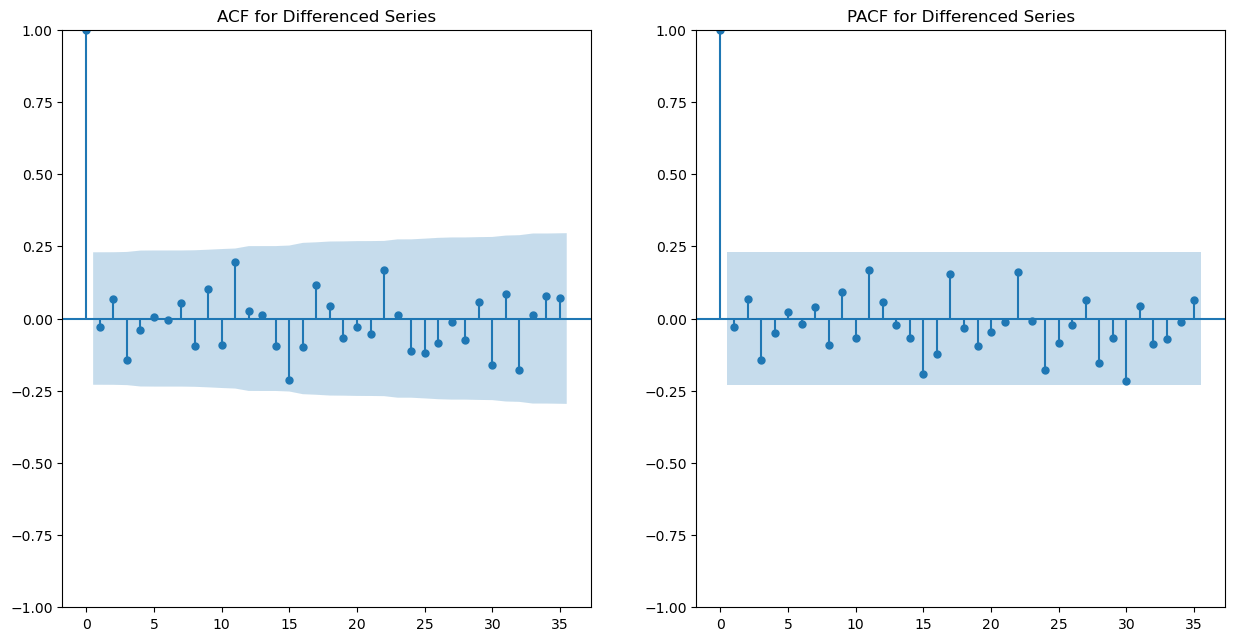

In [13]:
plt.figure(figsize=(15, 7.5))
plt.subplot(121)
plot_acf(mshp_diff['Differenced_Close'], ax=plt.gca(), lags=35)
plt.title('ACF for Differenced Series')

plt.subplot(122)
plot_pacf(mshp_diff['Differenced_Close'], ax=plt.gca(), lags=35)
plt.title('PACF for Differenced Series')
plt.show()

In [14]:
model = ARIMA(mshp['Close'], order=(30, 1, 1))
fitted_model = model.fit()

print(fitted_model.summary())

C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   74
Model:                ARIMA(30, 1, 1)   Log Likelihood                -153.662
Date:                Mon, 22 Apr 2024   AIC                            371.324
Time:                        01:57:22   BIC                            444.619
Sample:                             0   HQIC                           400.533
                                 - 74                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3472      0.437     -0.795      0.426      -1.203       0.508
ar.L2          0.0249      0.211      0.118      0.906      -0.388       0.438
ar.L3          0.0024      0.276      0.009      0.9

In [15]:
forecast = fitted_model.forecast(steps=14)
print(forecast)

74    157.323574
75    154.056399
76    151.326116
77    148.589628
78    148.630114
79    148.481774
80    146.844460
81    145.822878
82    141.617225
83    142.773344
84    141.262522
85    141.966237
86    140.758315
87    141.420953
Name: predicted_mean, dtype: float64


C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [16]:
for i, price in enumerate(forecast, 1):
    print(f"Day {i}: ${price:.2f}")

Day 1: $157.32
Day 2: $154.06
Day 3: $151.33
Day 4: $148.59
Day 5: $148.63
Day 6: $148.48
Day 7: $146.84
Day 8: $145.82
Day 9: $141.62
Day 10: $142.77
Day 11: $141.26
Day 12: $141.97
Day 13: $140.76
Day 14: $141.42


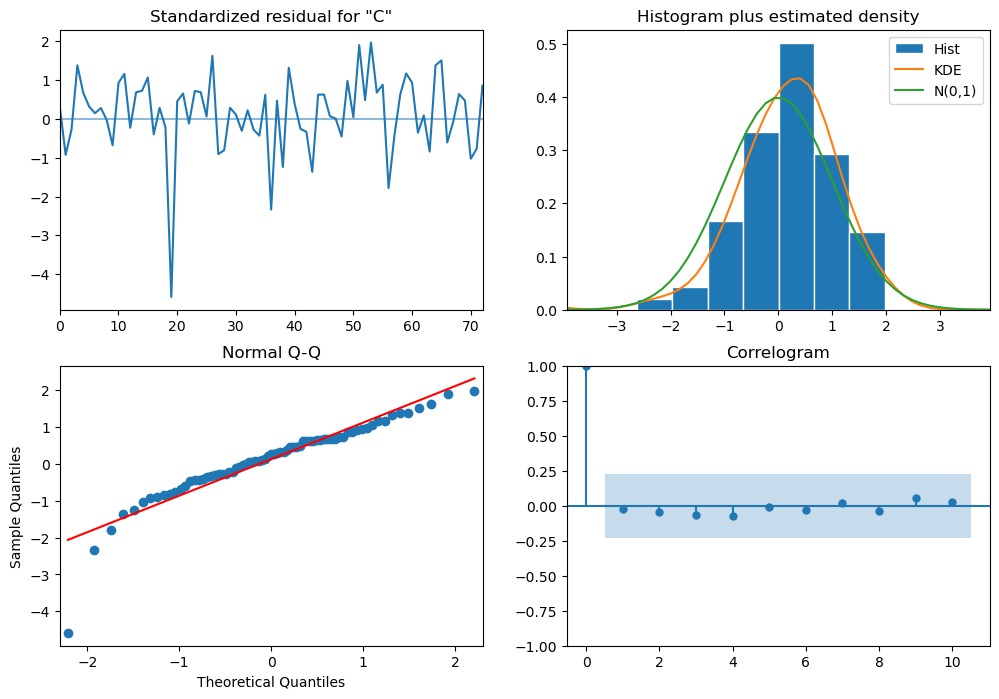

In [17]:
fitted_model.plot_diagnostics(figsize=(12, 8))
plt.show()

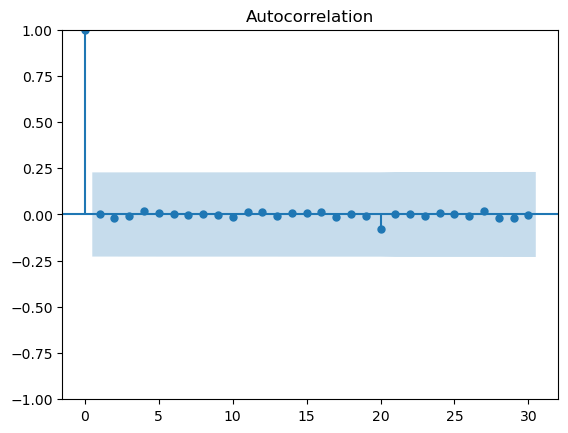

In [18]:
plot_acf(fitted_model.resid, lags=30)
plt.show()
